In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as stats
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import SelectKBest, f_regression

import wrangle
import evaluate
import env

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = wrangle.get_zillow_data()
df.head()

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt,tax_value
0,4.0,3.5,2.0,NaN,3100.0,4506.0,6059.0,1286.0,53571.0,96978.0,1998.0,1023282.0
1,2.0,1.0,1.0,NaN,1465.0,12647.0,6111.0,2061.0,13091.0,97099.0,1967.0,464000.0
2,3.0,2.0,2.0,1.0,1243.0,8432.0,6059.0,1286.0,21412.0,97078.0,1962.0,564778.0
3,4.0,3.0,NaN,1.0,2376.0,13038.0,6037.0,3101.0,396551.0,96330.0,1970.0,145143.0
4,4.0,3.0,NaN,1.0,2962.0,63000.0,6037.0,3101.0,47019.0,96293.0,1950.0,773303.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   52441 non-null  float64
 1   bathrooms  52441 non-null  float64
 2   garages    18015 non-null  float64
 3   pools      11096 non-null  float64
 4   area       52359 non-null  float64
 5   lot_size   52072 non-null  float64
 6   fips       52441 non-null  float64
 7   county     52441 non-null  float64
 8   city       51404 non-null  float64
 9   zip        52415 non-null  float64
 10  yearbuilt  52325 non-null  float64
 11  tax_value  52440 non-null  float64
dtypes: float64(12)
memory usage: 5.2 MB


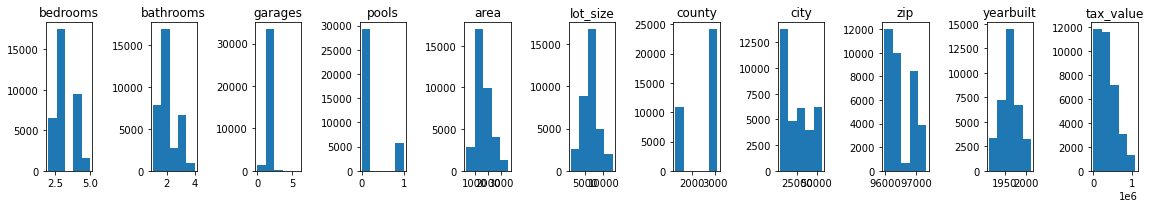

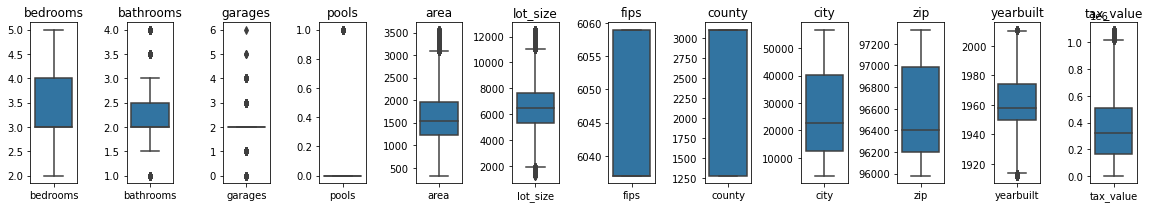

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt,tax_value
12995,4.0,2.0,2.0,0.0,1604.0,6512.0,6037.0,3101.0,5534.0,97318.0,1957.0,63088.0
6089,3.0,2.0,2.0,0.0,1108.0,5753.0,6037.0,3101.0,12292.0,96213.0,1955.0,411255.0
13610,3.0,1.0,2.0,0.0,1040.0,6244.0,6059.0,1286.0,18874.0,96186.0,1950.0,429746.0
36691,2.0,1.0,2.0,0.0,926.0,7869.0,6037.0,3101.0,12447.0,96415.0,1951.0,115097.0
51894,4.0,3.0,2.0,0.0,1978.0,7524.0,6037.0,3101.0,40227.0,97328.0,1989.0,144130.0


In [4]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.prepare_zillow(df, 'tax_value', ['bedrooms', 'bathrooms', 'area', 'lot_size', 'fips', 'county', 'city', 'zip', 'yearbuilt', 'tax_value'])
train.head()

In [5]:
train.shape, validate.shape, test.shape

((19577, 12), (8391, 12), (6993, 12))

In [6]:
train.head()

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt,tax_value
12995,4.0,2.0,2.0,0.0,1604.0,6512.0,6037.0,3101.0,5534.0,97318.0,1957.0,63088.0
6089,3.0,2.0,2.0,0.0,1108.0,5753.0,6037.0,3101.0,12292.0,96213.0,1955.0,411255.0
13610,3.0,1.0,2.0,0.0,1040.0,6244.0,6059.0,1286.0,18874.0,96186.0,1950.0,429746.0
36691,2.0,1.0,2.0,0.0,926.0,7869.0,6037.0,3101.0,12447.0,96415.0,1951.0,115097.0
51894,4.0,3.0,2.0,0.0,1978.0,7524.0,6037.0,3101.0,40227.0,97328.0,1989.0,144130.0


In [7]:
X_train

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt
12995,0.666667,0.333333,0.4,0.0,0.394688,0.464880,0.0,1.0,0.038338,0.991098,0.454545
6089,0.333333,0.333333,0.4,0.0,0.241507,0.397311,0.0,1.0,0.165156,0.171365,0.434343
13610,0.333333,0.000000,0.4,0.0,0.220506,0.441022,1.0,0.0,0.288671,0.151335,0.383838
36691,0.000000,0.000000,0.4,0.0,0.185300,0.585685,0.0,1.0,0.168065,0.321217,0.393939
51894,0.666667,0.666667,0.4,0.0,0.510191,0.554972,0.0,1.0,0.689373,0.998516,0.777778
...,...,...,...,...,...,...,...,...,...,...,...
32012,0.000000,0.000000,0.4,0.0,0.196418,0.596724,1.0,0.0,0.249076,0.772997,0.575758
51961,0.333333,0.333333,0.4,0.0,0.400865,0.406748,0.0,1.0,0.038338,0.991840,0.757576
4614,0.333333,0.333333,0.4,0.0,0.416306,0.381821,0.0,1.0,0.803299,0.196588,0.404040
16680,0.333333,0.000000,0.4,0.0,0.242742,0.348082,0.0,1.0,0.961380,0.132789,0.424242


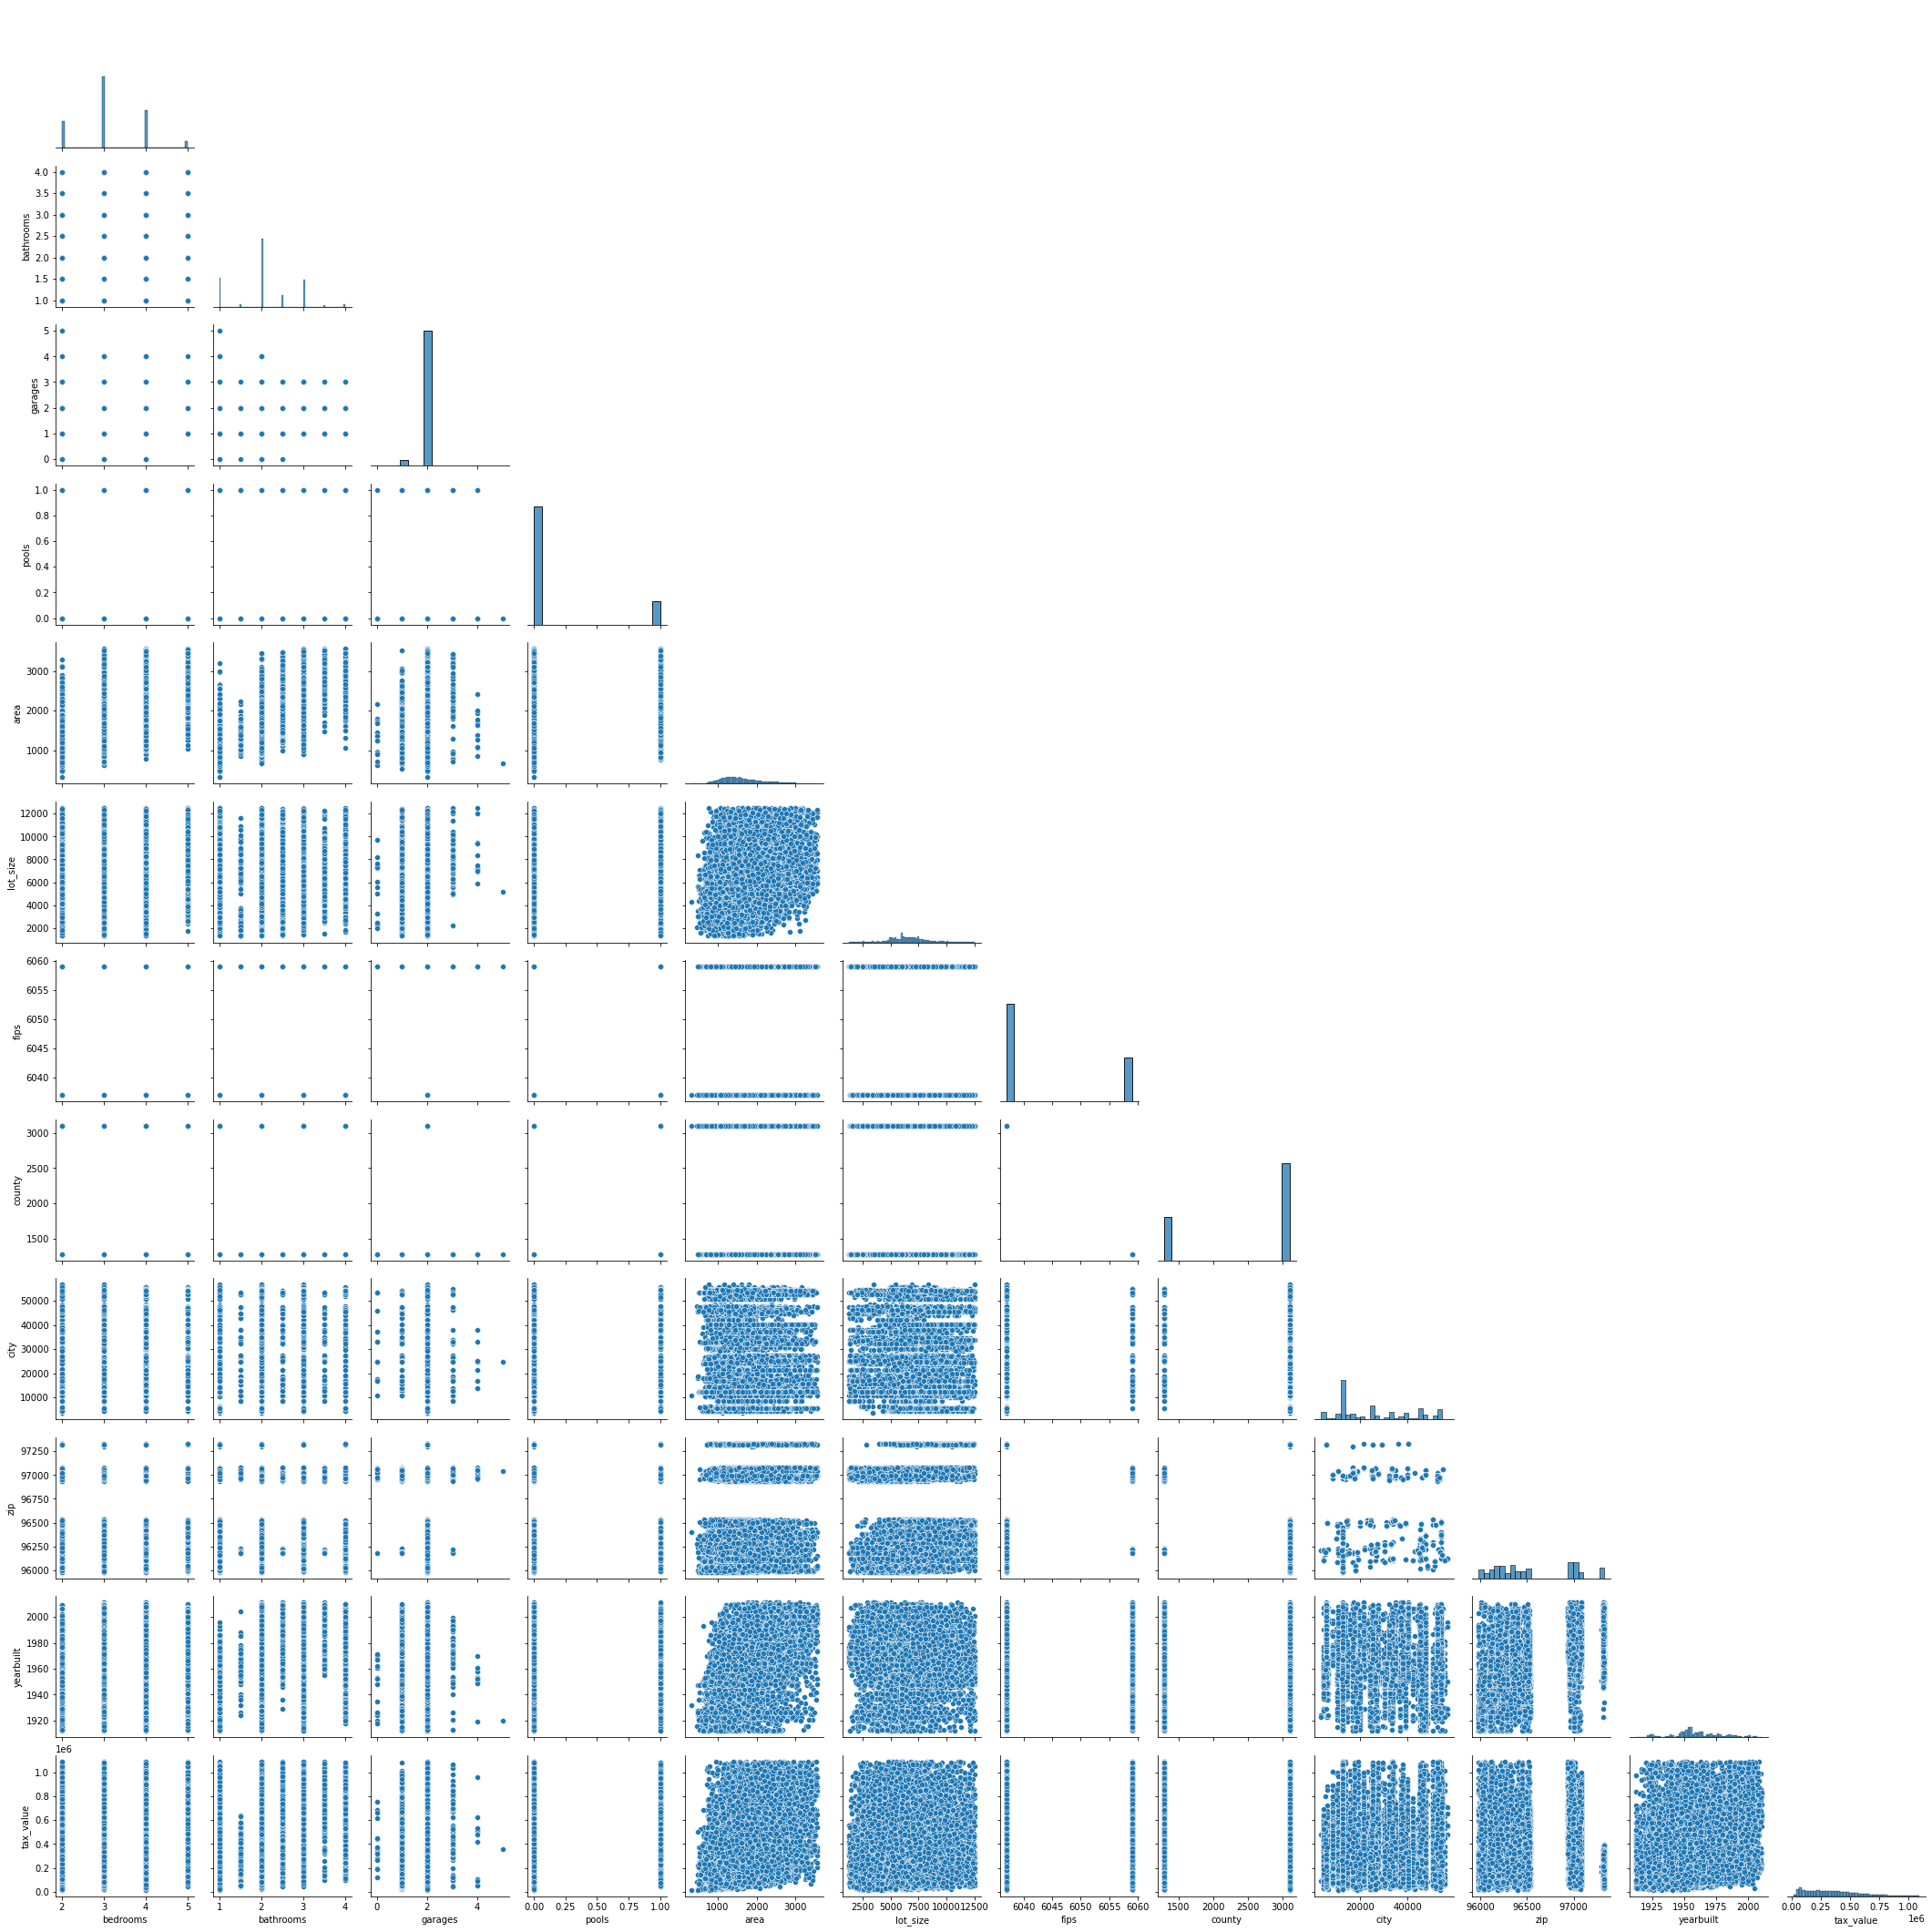

In [8]:
sns.pairplot(data=train, corner=True)
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19577 entries, 12995 to 7230
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   19577 non-null  float64
 1   bathrooms  19577 non-null  float64
 2   garages    19577 non-null  float64
 3   pools      19577 non-null  float64
 4   area       19577 non-null  float64
 5   lot_size   19577 non-null  float64
 6   fips       19577 non-null  float64
 7   county     19577 non-null  float64
 8   city       19577 non-null  float64
 9   zip        19577 non-null  float64
 10  yearbuilt  19577 non-null  float64
 11  tax_value  19577 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [10]:
train[['area','lot_size']]

,area,lot_size
12995,1604.0,6512.0
6089,1108.0,5753.0
13610,1040.0,6244.0
36691,926.0,7869.0
51894,1978.0,7524.0
...,...,...
32012,962.0,7993.0
51961,1624.0,5859.0
4614,1674.0,5579.0
16680,1112.0,5200.0


In [11]:
train.columns

Index(['bedrooms', 'bathrooms', 'garages', 'pools', 'area', 'lot_size', 'fips',
       'county', 'city', 'zip', 'yearbuilt', 'tax_value'],
      dtype='object')

In [12]:
train.zip.value_counts()

97318.0    298
97319.0    298
97328.0    275
97329.0    244
96193.0    244
          ... 
96275.0      1
95993.0      1
96160.0      1
95996.0      1
96014.0      1
Name: zip, Length: 341, dtype: int64

In [13]:
train.fips.value_counts()

6037.0    13519
6059.0     6058
Name: fips, dtype: int64

In [14]:
train.county.value_counts()

3101.0    13519
1286.0     6058
Name: county, dtype: int64

In [15]:
train.city.value_counts()

12447.0    4503
5534.0      784
46298.0     748
40227.0     698
16764.0     534
           ... 
3491.0        2
16677.0       2
36078.0       1
21395.0       1
32927.0       1
Name: city, Length: 129, dtype: int64

## I feel as though area and rooms alone won't be the best predictor after constructing my MVP.  With the inclusion of features that help outline location based properties of each house we will be able to better predict an accurate property tax assessed values of a sinle family property.

In [16]:
zillow_corr = train.corr(method='spearman')

In [17]:
zillow_corr

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt,tax_value
bedrooms,1.000000,0.567226,0.028490,0.177641,0.613715,0.205666,0.175971,-0.175971,0.023139,0.237203,0.411577,0.167607
bathrooms,0.567226,1.000000,0.067821,0.194355,0.787854,0.137683,0.241924,-0.241924,0.032985,0.302430,0.601574,0.330946
garages,0.028490,0.067821,1.000000,0.037585,0.091913,0.036023,-0.270666,0.270666,-0.058091,-0.144390,0.040866,0.010673
pools,0.177641,0.194355,0.037585,1.000000,0.232726,0.250030,0.051922,-0.051922,-0.028397,0.090597,0.105568,0.124200
area,0.613715,0.787854,0.091913,0.232726,1.000000,0.262296,0.231067,-0.231067,0.031974,0.251995,0.515453,0.360005
lot_size,0.205666,0.137683,0.036023,0.250030,0.262296,1.000000,-0.136494,0.136494,-0.086161,0.183286,0.016398,-0.020840
fips,0.175971,0.241924,-0.270666,0.051922,0.231067,-0.136494,1.000000,-1.000000,0.186697,0.521747,0.412243,0.210333
county,-0.175971,-0.241924,0.270666,-0.051922,-0.231067,0.136494,-1.000000,1.000000,-0.186697,-0.521747,-0.412243,-0.210333
city,0.023139,0.032985,-0.058091,-0.028397,0.031974,-0.086161,0.186697,-0.186697,1.000000,0.092064,0.058595,0.089097
zip,0.237203,0.302430,-0.144390,0.090597,0.251995,0.183286,0.521747,-0.521747,0.092064,1.000000,0.576168,0.026496


<function matplotlib.pyplot.show(close=None, block=None)>

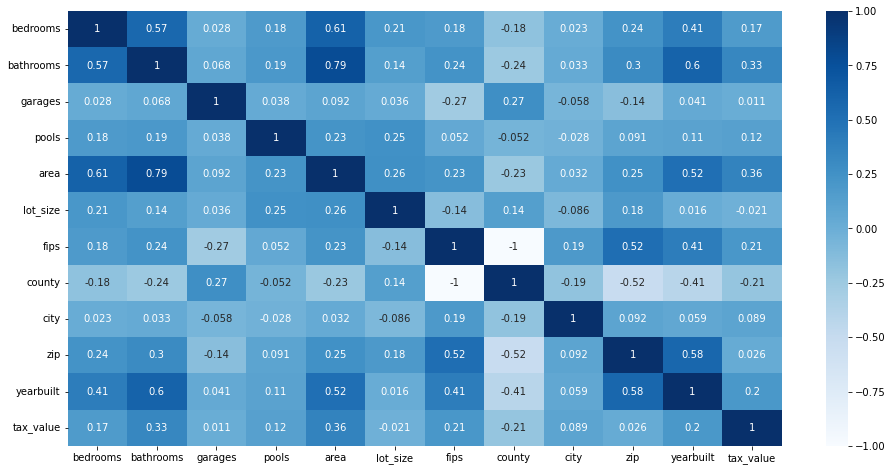

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(zillow_corr, cmap='Blues', annot=True)
plt.show

## Based off of my heatmap there is less correlation between location based features and tax_value than there is with space and tax_value.  Due to area and bathrooms/bedrooms having a high correlation as independent variables, I may not want to use all three of them within a linear regression model hence why my MVP had a low increase in accuracy from the baseline.

In [19]:
for col in train:
    print(col)
    r, p_value = spearmanr(train[col], train.tax_value)

    print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')
    print()

    if p_value < 0.05:
        print('We can reject the null hypothesis')
        print()
    else:
        print('we cannot reject the null hypothesis')
        print()

bedrooms
Correlation Coefficient by Spearman Test: 0.16760721404389378
p-value: 2.5791153575626616e-123

We can reject the null hypothesis

bathrooms
Correlation Coefficient by Spearman Test: 0.33094577817383325
p-value: 0.0

We can reject the null hypothesis

garages
Correlation Coefficient by Spearman Test: 0.010673334357285395
p-value: 0.13534899759812274

we cannot reject the null hypothesis

pools
Correlation Coefficient by Spearman Test: 0.12420017329057548
p-value: 3.804330695130873e-68

We can reject the null hypothesis

area
Correlation Coefficient by Spearman Test: 0.36000524435423825
p-value: 0.0

We can reject the null hypothesis

lot_size
Correlation Coefficient by Spearman Test: -0.020840017349500407
p-value: 0.003545271664357654

We can reject the null hypothesis

fips
Correlation Coefficient by Spearman Test: 0.21033270644394164
p-value: 1.2524304699813208e-194

We can reject the null hypothesis

county
Correlation Coefficient by Spearman Test: -0.21033270644394164
p-va

## Upon utilizing the Spearman Test to check for correlation via hypothesis testing, I discovered that all features selected had some correlation to tax_value except for garages.

## Although my location based features have a very low correlation, I want to visualize their relationship to tax value to see if there is any pattern in terms of groupings maybe.

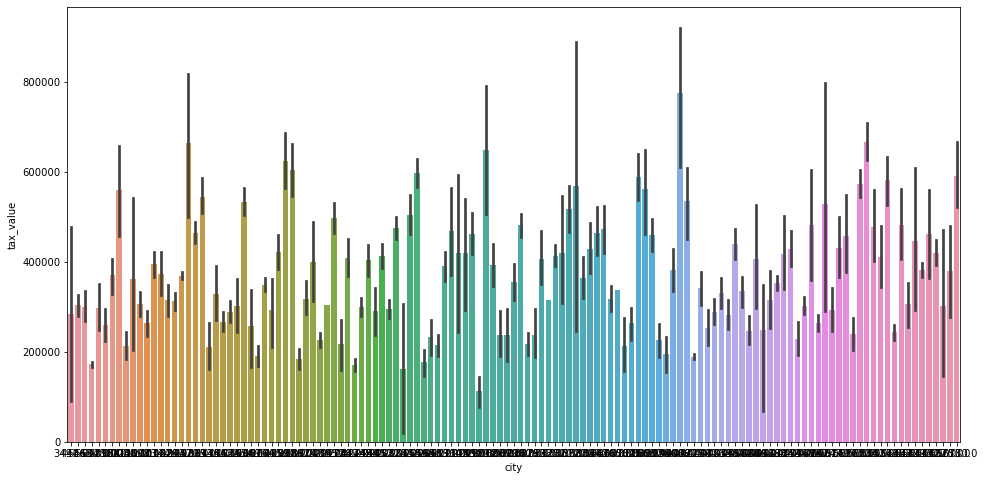

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(x='city', y='tax_value', data=train)
plt.show()

<AxesSubplot:xlabel='county', ylabel='tax_value'>

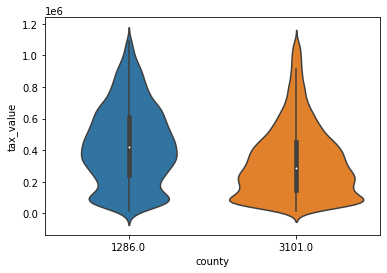

In [21]:
sns.violinplot(x='county', y= 'tax_value', data=train)

<AxesSubplot:xlabel='fips', ylabel='tax_value'>

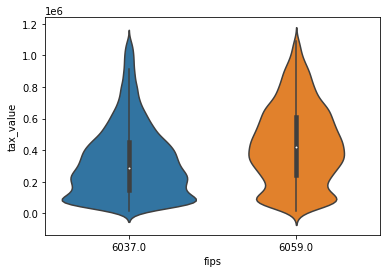

In [22]:
sns.violinplot(x='fips', y='tax_value', data=train)

## After doing a little bit of visualization with the location based features, I've noticed two things:

- fips and county seem to be better predictors due to lower variation between results

- looking at fips (code 6059 seems to have more houses with higher tax value) looking at county (code 1286 seems to have more houses with higher tax value)

# Feature Selection

In [23]:
evaluate.select_kbest(X_train, y_train, 4)

Index(['bathrooms', 'area', 'fips', 'county'], dtype='object')

In [24]:
evaluate.rfe(X_train, y_train, 3)

,rfe_ranking
bedrooms,4
bathrooms,3
garages,5
pools,9
area,1
lot_size,6
fips,1
county,1
city,8
zip,2


## According to both feature selection tools, Area, Fips, and County should be my main features when creating my models so I will use these first and add if necessary or feature engineer.

In [25]:
X_train_alt = X_train.drop(columns=['bedrooms', 'bathrooms', 'garages', 'pools', 'lot_size', 'city', 'zip', 'yearbuilt'])
X_validate_alt = X_validate.drop(columns=['bedrooms', 'bathrooms', 'garages', 'pools', 'lot_size', 'city', 'zip', 'yearbuilt'])

In [26]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [27]:
tax_value_mean = y_train['tax_value'].mean()
y_train['tax_value_mean'] = tax_value_mean
y_validate['tax_value_mean'] = tax_value_mean

In [28]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_mean) ** .5

print('RMSE using Mean\nTrain/In-Sample: ', round(rmse_train,2),
      '\nValidate/Out-of-Sample: ', round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  238937.65 
Validate/Out-of-Sample:  236726.74


In [29]:
metric_df = pd.DataFrame(
    data=[{
        'model': 'mean_baseline',
        'rmse': rmse_validate,
        'r^2': explained_variance_score(y_validate.tax_value, y_validate.tax_value_mean)
    }])

In [30]:
metric_df

,model,rmse,r^2
0,mean_baseline,236726.735317,1.110223e-16


# OLS Model Creation

In [31]:
metric_df = evaluate.model_metrics(LinearRegression(), X_train_alt, y_train, X_validate_alt, y_validate, metric_df)

Name for model? OLS


In [32]:
metric_df

,model,rmse,r^2
0,mean_baseline,236726.735317,1.110223e-16
1,OLS,213669.949340,1.851515e-01


# LASSO + LARS

In [33]:
metric_df = evaluate.model_metrics(LassoLars(alpha=1), X_train_alt, y_train, X_validate_alt, y_validate, metric_df)

Name for model? Lasso alpha1


In [34]:
metric_df

,model,rmse,r^2
0,mean_baseline,236726.735317,1.110223e-16
1,OLS,213669.949340,1.851515e-01
2,Lasso alpha1,215449.440656,1.715549e-01


# GLM

In [35]:
metric_df = evaluate.model_metrics(TweedieRegressor(power = 1, alpha = 1), X_train_alt, y_train, X_validate_alt, y_validate, metric_df)

Name for model? GLM Poisson alpha1


In [36]:
metric_df

,model,rmse,r^2
0,mean_baseline,236726.735317,1.110223e-16
1,OLS,213669.949340,1.851515e-01
2,Lasso alpha1,215449.440656,1.715549e-01
3,GLM Poisson alpha1,213307.949980,1.879191e-01


# Polynomial Regression

In [37]:
pf = PolynomialFeatures(degree = 2)

X_train_d2 = pf.fit_transform(X_train_alt)

X_validate_d2 = pf.transform(X_validate_alt)

In [38]:
lm2 = LinearRegression(normalize=True)

lm2.fit(X_train_d2, y_train.tax_value)

LinearRegression(normalize=True)

In [39]:
in_sample_pred = lm2.predict(X_train_d2)
out_sample_pred = lm2.predict(X_validate_d2)
model_name = input('Name for model?')
y_train[model_name] = in_sample_pred
y_validate[model_name] = out_sample_pred
 
rmse_val = mean_squared_error(
y_validate['tax_value'], out_sample_pred, squared=False)
r_squared_val = explained_variance_score(
        y_validate['tax_value'], out_sample_pred)
metric_df = metric_df.append({
        'model': model_name,
        'rmse': rmse_val,
        'r^2': r_squared_val
    }, ignore_index=True)

Name for model? Quadratic


In [40]:
metric_df

,model,rmse,r^2
0,mean_baseline,236726.735317,1.110223e-16
1,OLS,213669.949340,1.851515e-01
2,Lasso alpha1,215449.440656,1.715549e-01
3,GLM Poisson alpha1,213307.949980,1.879191e-01
4,Quadratic,213094.943386,1.895540e-01


# My Quadratic model is the best model thus far but isn't performing as expected.  I will try feature engineering to see if I can introduce new ways to predict our target variable

In [4]:
def check_decade(n):
    if n < 1810:
        return 1800
    elif n < 1820:
        return 1810
    elif n < 1830:
        return 1820
    elif n < 1840:
        return 1830
    elif n < 1850:
        return 1840
    elif n < 1860:
        return 1850
    elif n < 1870:
        return 1860
    elif n < 1880:
        return 1870
    elif n < 1890:
        return 1880
    elif n < 1900:
        return 1890
    elif n < 1910:
        return 1900
    elif n < 1920:
        return 1910
    elif n < 1930:
        return 1920
    elif n < 1940:
        return 1930
    elif n < 1950:
        return 1940
    elif n < 1960:
        return 1950
    elif n < 1970:
        return 1960
    elif n < 1980:
        return 1970
    elif n < 1990:
        return 1980
    elif n < 2000:
        return 1990
    elif n < 2010:
        return 2000
    else:
        return 2010

In [42]:
train.head()

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt,tax_value
12995,4.0,2.0,2.0,0.0,1604.0,6512.0,6037.0,3101.0,5534.0,97318.0,1957.0,63088.0
6089,3.0,2.0,2.0,0.0,1108.0,5753.0,6037.0,3101.0,12292.0,96213.0,1955.0,411255.0
13610,3.0,1.0,2.0,0.0,1040.0,6244.0,6059.0,1286.0,18874.0,96186.0,1950.0,429746.0
36691,2.0,1.0,2.0,0.0,926.0,7869.0,6037.0,3101.0,12447.0,96415.0,1951.0,115097.0
51894,4.0,3.0,2.0,0.0,1978.0,7524.0,6037.0,3101.0,40227.0,97328.0,1989.0,144130.0


In [5]:
df['yearbuilt'] = df.yearbuilt.apply(check_decade)

In [6]:
df.head()

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,yearbuilt,tax_value
0,4.0,3.5,2.0,NaN,3100.0,4506.0,6059.0,1286.0,53571.0,96978.0,1990,1023282.0
1,2.0,1.0,1.0,NaN,1465.0,12647.0,6111.0,2061.0,13091.0,97099.0,1960,464000.0
2,3.0,2.0,2.0,1.0,1243.0,8432.0,6059.0,1286.0,21412.0,97078.0,1960,564778.0
3,4.0,3.0,NaN,1.0,2376.0,13038.0,6037.0,3101.0,396551.0,96330.0,1970,145143.0
4,4.0,3.0,NaN,1.0,2962.0,63000.0,6037.0,3101.0,47019.0,96293.0,1950,773303.0


In [7]:
df = df.rename(columns={'yearbuilt':'decade'})
df.head()

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,decade,tax_value
0,4.0,3.5,2.0,NaN,3100.0,4506.0,6059.0,1286.0,53571.0,96978.0,1990,1023282.0
1,2.0,1.0,1.0,NaN,1465.0,12647.0,6111.0,2061.0,13091.0,97099.0,1960,464000.0
2,3.0,2.0,2.0,1.0,1243.0,8432.0,6059.0,1286.0,21412.0,97078.0,1960,564778.0
3,4.0,3.0,NaN,1.0,2376.0,13038.0,6037.0,3101.0,396551.0,96330.0,1970,145143.0
4,4.0,3.0,NaN,1.0,2962.0,63000.0,6037.0,3101.0,47019.0,96293.0,1950,773303.0


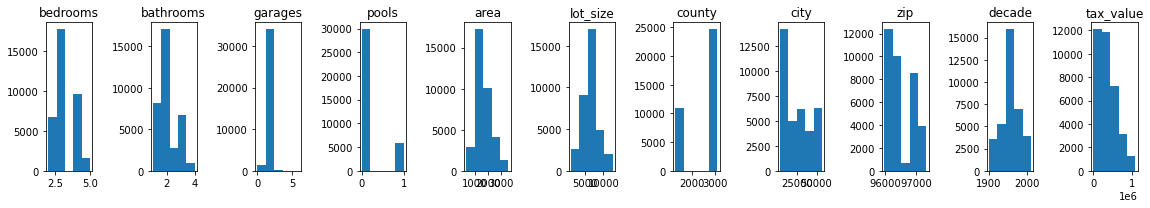

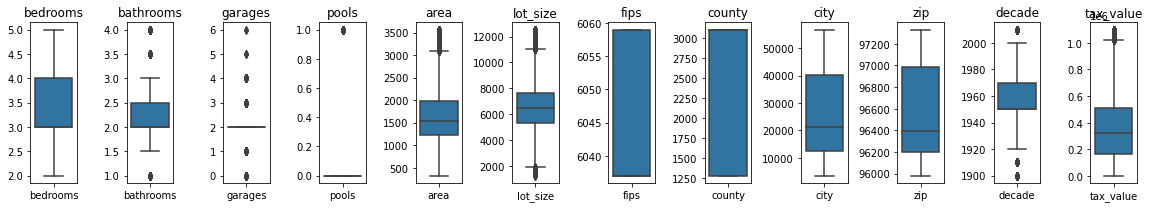

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,decade,tax_value
34441,4.0,2.0,2.0,0.0,1624.0,6269.0,6037.0,3101.0,5534.0,97318.0,1980,149204.0
43694,2.0,2.0,2.0,0.0,912.0,6931.0,6037.0,3101.0,54212.0,96510.0,1940,312261.0
50516,4.0,2.0,2.0,0.0,1446.0,9545.0,6059.0,1286.0,8384.0,97008.0,1960,66931.0
44791,3.0,3.5,2.0,0.0,3274.0,7073.0,6059.0,1286.0,24812.0,97041.0,2000,834699.0
31717,3.0,1.0,2.0,1.0,1210.0,5890.0,6037.0,3101.0,12292.0,96212.0,1950,332567.0


In [8]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.prepare_zillow(df, 'tax_value', ['bedrooms', 'bathrooms', 'area', 'lot_size', 'fips', 'county', 'city', 'zip', 'decade', 'tax_value'])
train.head()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19924 entries, 34441 to 20485
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   19924 non-null  float64
 1   bathrooms  19924 non-null  float64
 2   garages    19924 non-null  float64
 3   pools      19924 non-null  float64
 4   area       19924 non-null  float64
 5   lot_size   19924 non-null  float64
 6   fips       19924 non-null  float64
 7   county     19924 non-null  float64
 8   city       19924 non-null  float64
 9   zip        19924 non-null  float64
 10  decade     19924 non-null  int64  
 11  tax_value  19924 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.0 MB


In [10]:
zillow_corr = train.corr(method='spearman')
zillow_corr

,bedrooms,bathrooms,garages,pools,area,lot_size,fips,county,city,zip,decade,tax_value
bedrooms,1.000000,0.575483,0.028928,0.178797,0.616791,0.214685,0.171563,-0.171563,0.029102,0.250403,0.398045,0.160073
bathrooms,0.575483,1.000000,0.067639,0.192655,0.784214,0.139654,0.249421,-0.249421,0.039725,0.322472,0.595589,0.334405
garages,0.028928,0.067639,1.000000,0.036847,0.087697,0.041584,-0.267729,0.267729,-0.065748,-0.147364,0.042179,0.005148
pools,0.178797,0.192655,0.036847,1.000000,0.232532,0.250988,0.053773,-0.053773,-0.038811,0.085613,0.098325,0.128659
area,0.616791,0.784214,0.087697,0.232532,1.000000,0.263384,0.233069,-0.233069,0.029691,0.265671,0.501805,0.364947
lot_size,0.214685,0.139654,0.041584,0.250988,0.263384,1.000000,-0.124140,0.124140,-0.079686,0.202361,0.006000,-0.022492
fips,0.171563,0.249421,-0.267729,0.053773,0.233069,-0.124140,1.000000,-1.000000,0.197424,0.524469,0.392130,0.218137
county,-0.171563,-0.249421,0.267729,-0.053773,-0.233069,0.124140,-1.000000,1.000000,-0.197424,-0.524469,-0.392130,-0.218137
city,0.029102,0.039725,-0.065748,-0.038811,0.029691,-0.079686,0.197424,-0.197424,1.000000,0.101959,0.059969,0.096016
zip,0.250403,0.322472,-0.147364,0.085613,0.265671,0.202361,0.524469,-0.524469,0.101959,1.000000,0.568700,0.034051


<function matplotlib.pyplot.show(close=None, block=None)>

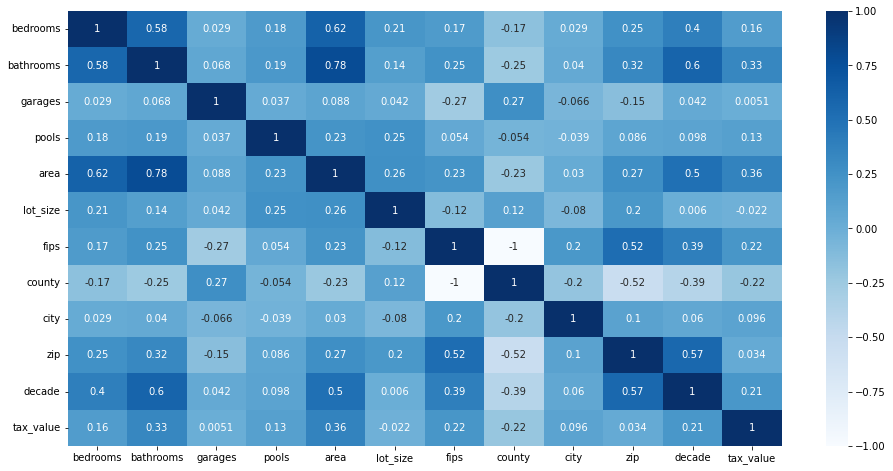

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(zillow_corr, cmap='Blues', annot=True)
plt.show

In [12]:
for col in train:
    print(col)
    r, p_value = spearmanr(train[col], train.tax_value)

    print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')
    print()

    if p_value < 0.05:
        print('We can reject the null hypothesis')
        print()
    else:
        print('we cannot reject the null hypothesis')
        print()

bedrooms
Correlation Coefficient by Spearman Test: 0.16007283341631734
p-value: 1.8014658778036614e-114

We can reject the null hypothesis

bathrooms
Correlation Coefficient by Spearman Test: 0.3344053125399522
p-value: 0.0

We can reject the null hypothesis

garages
Correlation Coefficient by Spearman Test: 0.005148209733945725
p-value: 0.4674456710985847

we cannot reject the null hypothesis

pools
Correlation Coefficient by Spearman Test: 0.12865915601087605
p-value: 2.7106172073635398e-74

We can reject the null hypothesis

area
Correlation Coefficient by Spearman Test: 0.3649471079883518
p-value: 0.0

We can reject the null hypothesis

lot_size
Correlation Coefficient by Spearman Test: -0.022491599025408225
p-value: 0.001498646013298341

We can reject the null hypothesis

fips
Correlation Coefficient by Spearman Test: 0.218137267107924
p-value: 3.2084251916085445e-213

We can reject the null hypothesis

county
Correlation Coefficient by Spearman Test: -0.218137267107924
p-value: 3

<AxesSubplot:xlabel='decade', ylabel='tax_value'>

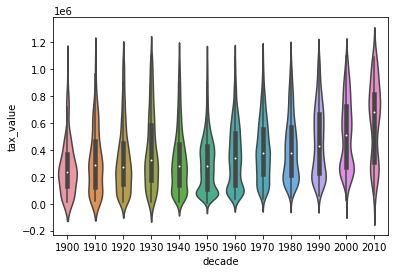

In [13]:
sns.violinplot(x='decade', y= 'tax_value', data=train)

In [14]:
evaluate.select_kbest(X_train, y_train, 4)

Index(['bathrooms', 'area', 'fips', 'county'], dtype='object')

In [15]:
evaluate.rfe(X_train, y_train, 3)

,rfe_ranking
bedrooms,4
bathrooms,3
garages,9
pools,8
area,1
lot_size,6
fips,1
county,1
city,7
zip,2


In [17]:
X_train_alt = X_train.drop(columns=['bedrooms', 'garages', 'pools', 'lot_size', 'city', 'decade'])
X_validate_alt = X_validate.drop(columns=['bedrooms', 'garages', 'pools', 'lot_size', 'city', 'decade'])

In [18]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

tax_value_mean = y_train['tax_value'].mean()
y_train['tax_value_mean'] = tax_value_mean
y_validate['tax_value_mean'] = tax_value_mean

rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_mean) ** .5

print('RMSE using Mean\nTrain/In-Sample: ', round(rmse_train,2),
      '\nValidate/Out-of-Sample: ', round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  238786.62 
Validate/Out-of-Sample:  240294.43


In [19]:
metric_df = pd.DataFrame(
    data=[{
        'model': 'mean_baseline',
        'rmse': rmse_validate,
        'r^2': explained_variance_score(y_validate.tax_value, y_validate.tax_value_mean)
    }])

metric_df

,model,rmse,r^2
0,mean_baseline,240294.425118,0.0


In [20]:
metric_df = evaluate.model_metrics(LinearRegression(), X_train_alt, y_train, X_validate_alt, y_validate, metric_df)

Name for model? OLS


In [21]:
metric_df

,model,rmse,r^2
0,mean_baseline,240294.425118,0.000000
1,OLS,211431.738622,0.225858


In [24]:
metric_df = evaluate.model_metrics(LassoLars(alpha=2), X_train_alt, y_train, X_validate_alt, y_validate, metric_df)

Name for model? Lasso alpha2


In [25]:
metric_df

,model,rmse,r^2
0,mean_baseline,240294.425118,0.000000
1,OLS,211431.738622,0.225858
2,Lasso alpha1,215216.928466,0.197840
3,Lasso alpha2,215234.844539,0.197706


In [30]:
metric_df = evaluate.model_metrics(TweedieRegressor(power = 3, alpha = 1), X_train_alt, y_train, X_validate_alt, y_validate, metric_df)

Name for model? GLM Inverse Gaussian


In [31]:
metric_df

,model,rmse,r^2
0,mean_baseline,240294.425118,0.000000
1,OLS,211431.738622,0.225858
2,Lasso alpha1,215216.928466,0.197840
3,Lasso alpha2,215234.844539,0.197706
4,GLM Poisson alpha1,212378.778510,0.218919
5,GLM Gamma alpha1,234906.583104,0.045013
6,GLM Inverse Gaussian,240294.425118,0.000000


In [32]:
pf = PolynomialFeatures(degree = 2)

X_train_d2 = pf.fit_transform(X_train_alt)

X_validate_d2 = pf.transform(X_validate_alt)

lm2 = LinearRegression(normalize=True)

lm2.fit(X_train_d2, y_train.tax_value)

in_sample_pred = lm2.predict(X_train_d2)
out_sample_pred = lm2.predict(X_validate_d2)
model_name = input('Name for model?')
y_train[model_name] = in_sample_pred
y_validate[model_name] = out_sample_pred
 
rmse_val = mean_squared_error(
y_validate['tax_value'], out_sample_pred, squared=False)
r_squared_val = explained_variance_score(
        y_validate['tax_value'], out_sample_pred)
metric_df = metric_df.append({
        'model': model_name,
        'rmse': rmse_val,
        'r^2': r_squared_val
    }, ignore_index=True)

Name for model? Quadratic


In [33]:
metric_df

,model,rmse,r^2
0,mean_baseline,240294.425118,0.000000
1,OLS,211431.738622,0.225858
2,Lasso alpha1,215216.928466,0.197840
3,Lasso alpha2,215234.844539,0.197706
4,GLM Poisson alpha1,212378.778510,0.218919
5,GLM Gamma alpha1,234906.583104,0.045013
6,GLM Inverse Gaussian,240294.425118,0.000000
7,Quadratic,208417.787007,0.247714


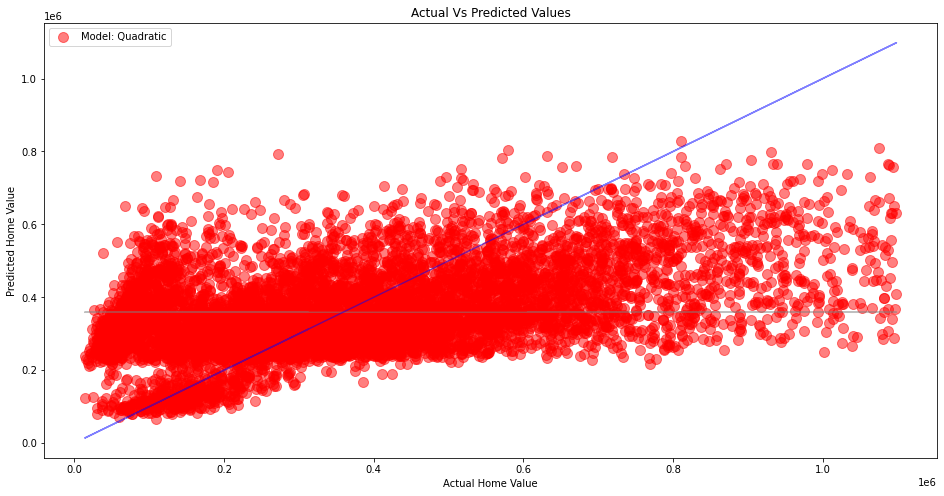

In [34]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_mean, alpha=.5, color='gray', label='_nolegend_')

plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color='blue', label='_nolegend_')

plt.scatter(y_validate.tax_value, out_sample_pred, 
            alpha=.5, color="red", s=100, label="Model: Quadratic")

plt.legend()
plt.xlabel("Actual Home Value")
plt.ylabel("Predicted Home Value")
plt.title("Actual Vs Predicted Values")
plt.show()

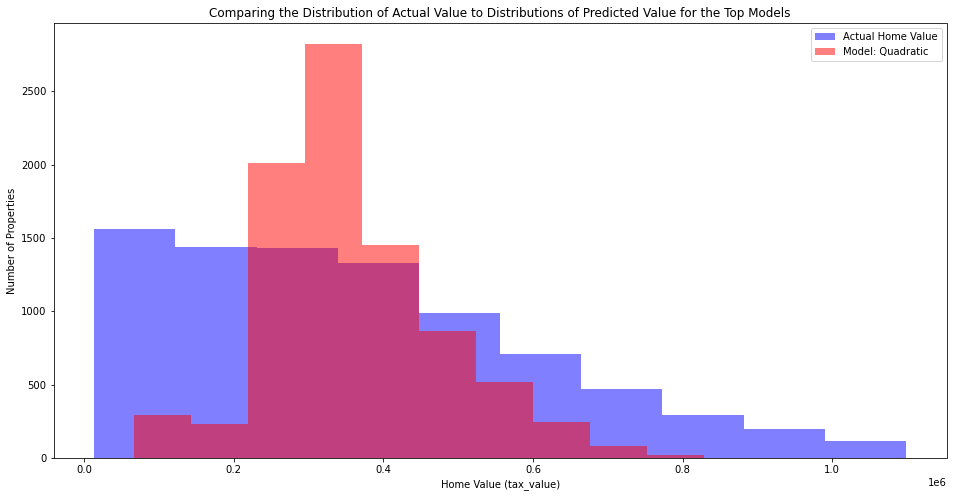

In [35]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Home Value")
plt.hist(out_sample_pred, color='red', alpha=.5, label="Model: Quadratic")
# plt.hist(y_validate.G3_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
# plt.hist(y_validate.G3_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Home Value (tax_value)")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Value to Distributions of Predicted Value for the Top Models")
plt.legend()
plt.show()